## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
# Create a Neural Network class
class ThreeLayerNeuralNetwork:
    # Initialize the class
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate, activation_function, Optimizer): 
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        self.learning_rate = learning_rate
        self.activation_function = activation_function
        self.Optimizer = Optimizer
        self.input_layer = np.zeros((self.input_nodes, 1))
        self.hidden_layer = np.zeros((self.hidden_nodes, 1))
        self.output_layer = np.zeros((self.output_nodes, 1))

    def change_learning_rate(self, learning_rate):
        self.learning_rate = learning_rate

    def change_activation_function(self, activation_function):
        self.activation_function = activation_function

    def change_Optimizer(self, Optimizer):
        self.Optimizer = Optimizer

    def change_hidden_nodes(self, hidden_nodes):
        self.hidden_nodes = hidden_nodes

    def _init_weight_matrices(self, input_nodes, hidden_nodes, output_nodes):
    # Xavier (Glorot) initialization for weight matrices
        xavier_scale_1 = np.sqrt(2.0 / (input_nodes + hidden_nodes))
        xavier_scale_2 = np.sqrt(2.0 / (hidden_nodes + output_nodes))
    
        # Initialize the weight matrices
        self.weight_matrix_1 = np.zeros((hidden_nodes, input_nodes))
        self.weight_matrix_2 = np.zeros((output_nodes, hidden_nodes))

    def _init_bias_vectors(self, input_nodes, hidden_nodes, output_nodes):
        # Initialize the Bias Vector 1
        # The Size of the Bias Vector 1 is (hidden_nodes, 1)
        self.bias_vector_1 = np.zeros((self.hidden_nodes, 1))
        # The Size of the Bias Vector 2 is (output_nodes, 1)
        self.bias_vector_2 = np.zeros((self.output_nodes, 1))

    def _loss_function(self, y, y_hat):
        # print('Loss', np.square(y - y_hat)/2)
        # The Loss Function is MSE
        return np.square(y - y_hat)/2
    
    def _loss_function_grad(self, y, y_hat):
        # print('Loss_Grad', np.abs(y_hat - y))
        return (y_hat - y)
    
    def _activation_function(self, x):
        # Write Code for the Tanh, activation function
        return np.tanh(x)
    
    def _grad_of_activation(self, x):
        # Gradient of Activation
        # print('Gradient_Val', 1 - np.tanh(x)**2)
        return 1 - np.tanh(x)**2

    def _forward_pass(self, input_vector):
        # The Size of the Input Vector is (input_nodes, 1)
        self.input_vector = input_vector
        # print("Input Vector: ", self.input_vector)
        # The Size of the Hidden Layer is (hidden_nodes, 1)
        self.input_vector = self.input_vector.reshape((-1, 1))
        self.activation_layer = np.dot(self.weight_matrix_1, self.input_vector) 
        # print("Activation Layer: ", self.activation_layer)
        self.hidden_layer = self._activation_function(self.activation_layer) + self.bias_vector_1
        # print("Hiddent Layer ", self.hidden_layer)
        # The Size of the Output Layer is (output_nodes, 1) 
        self.output_layer = np.dot(self.weight_matrix_2, self.hidden_layer) + self.bias_vector_2
        # print('==============================================================================================') 
        return self.output_layer

    def _backward_pass(self, target_vector):
        # Basically we need to obtain derivatives with respect to two weight matrices
        # Weight Matrix 1 -> (hidden_nodes, input_nodes)
        # Weight Matrix 2 -> (output_nodes, hidden_nodes)
        # Bias Vector 1 -> (hidden_nodes, 1)
        # Bias Vector 2 -> (output_nodes, 1)
        target_vector = np.array(target_vector)
        # First With Weight Matrix 2
        # The Size of the Target Vector is (output_nodes, 1)
        target_vector = target_vector.reshape((-1, 1))
        # First, we need to calculate the derivative of the loss function with respect to the output layer
        Loss_Derivative = self._loss_function_grad(target_vector, self.output_layer)
        # print("Target Vector: ", target_vector)
        # print("Output Layer: ", self.output_layer)
        # Second, we need to calculate the derivative of the output layer with respect to the weight matrix 2
        Weight_Matrix_2_Derivative = self.hidden_layer
        # Now, Vector Product of Loss Derivative and Weight Matrix 2 Derivative
        Weight_Matrix_2_Derivative = np.dot(Loss_Derivative, Weight_Matrix_2_Derivative.T)

        # # Now, Find the Bias Vector
        Bias_Vector_2_Derivative = Loss_Derivative

        # First, we need to calculate the derivative of the loss function with respect to the hidden layer
        Loss_Derivative = np.dot(self.weight_matrix_2.T, Loss_Derivative)
        # Second, we need to Calculate the derivative of the hidden layer with respect to the activation layer
        Activation_Layer_Derivative = self._grad_of_activation(self.activation_layer)
        # Here the Activation_Layer_Derivative is of shape (25, 1) -> Which is the same as the hidden layer -> Multiply element wise
        Temp_Dertivative = np.multiply(Loss_Derivative, Activation_Layer_Derivative)
        Weight_Matrix_1_Derivative = np.dot(Temp_Dertivative, self.input_vector.T)

        # Now, Find the Bias Vector
        Bias_Vector_1_Derivative = Temp_Dertivative
        
        # Now, we have the derivatives of the loss function with respect to the weight matrices
        # Now, we need to update the weight matrices
        # Update the Weight Matrix 1
        self.weight_matrix_1 = self.weight_matrix_1 - self.learning_rate * Weight_Matrix_1_Derivative
        self.bias_vector_1 = self.bias_vector_1 - self.learning_rate * Bias_Vector_1_Derivative
        # Update the Weight Matrix 2
        self.weight_matrix_2 = self.weight_matrix_2 - self.learning_rate * Weight_Matrix_2_Derivative
        self.bias_vector_2 = self.bias_vector_2 - self.learning_rate * Bias_Vector_2_Derivative

        # # Clear the Derivative Variables
        Weight_Matrix_1_Derivative = None
        Weight_Matrix_2_Derivative = None

    def Train(self, train_data_x, train_data_y, epochs):
        # Initialize the weights first
        self._init_weight_matrices(self.input_nodes, self.hidden_nodes, self.output_nodes)
        # Initialize the bias first
        self._init_bias_vectors(self.input_nodes, self.hidden_nodes, self.output_nodes)
        # Now, we need to train the model
        # We need to iterate over the training data
        # Plot the Losses Dynamically 

        # Create a figure and axis for dynamic plotting
        plt.ion()  # Turn on interactive mode for dynamic updates
        fig, ax = plt.subplots()

        losses = []

        # For, epochs number of times
        for epoch in range(epochs):
            for i in range(len(train_data_x) - 1):
                self._forward_pass(train_data_x[i])
                self._backward_pass(train_data_y[i])
    
            # Calculate and store losses
            epoch_losses = []
            for i in range(len(train_data_x) - 1):
                loss = self._loss_function(train_data_y[i], self._forward_pass(train_data_x[i]))
                epoch_losses.append(loss)
            
            # Append the average loss for the epoch to the list of losses
            losses.append(np.mean(epoch_losses))
    
            print('Epoch: ', epoch, ' Loss: ', losses[-1])

        ax.clear()
        ax.plot(losses, label='Loss')
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Loss')
        ax.legend()
        plt.pause(0.1)  # Pause for a short time to allow the plot to update
        
        plt.ioff()
        plt.show()

    def Test(self, data_point):
        # We need to iterate over the test data
        return self._forward_pass(data_point)

    def Predict(self, data_point):
        pass



## Load the Data

In [3]:
# Load the Data
data = pd.read_csv('./Concrete_Data.csv', header=None)
# Remove the First Row
data = data.iloc[1:]
# Print the Shape of the Data
print(data.shape)

# Target Variable 
target_variable = data.iloc[:, -1]
# Input Variables
input_variables = data.iloc[:, 0:8]

# Convert both to numpy arrays
target_variable = np.array(target_variable, dtype=np.float32)
input_variables = np.array(input_variables, dtype=np.float32)

print(target_variable.shape)
print(input_variables.shape)

# Preprocess the Data
########################

########################

# Split the Data into Train and Test
# Randomly choose 70% and 30% of the data
Total_samples = target_variable.shape[0]
Train_percentage = 0.7

Train_Samples = 0.7*Total_samples
Test_Samples = 0.3*Total_samples

# Shuffle The Data
indices = np.arange(Total_samples)
np.random.shuffle(indices)

# Split this data
Train_indices = indices[:int(Train_Samples)]
Test_indices = indices[int(Train_Samples):]

X_Train = input_variables[Train_indices]
Y_Train = target_variable[Train_indices]
x_test = input_variables[Test_indices]
y_test = target_variable[Test_indices]


(1030, 9)
(1030,)
(1030, 8)


# Training the Neural Network

Epoch:  0  Loss:  281.3451633488738
Epoch:  1  Loss:  167.76666689185927
Epoch:  2  Loss:  141.3011988067748
Epoch:  3  Loss:  135.24213010462532
Epoch:  4  Loss:  133.90823594030599
Epoch:  5  Loss:  133.64139293326545
Epoch:  6  Loss:  133.60204164497068
Epoch:  7  Loss:  133.60431798019158
Epoch:  8  Loss:  133.61049782120213
Epoch:  9  Loss:  133.6147056756004
Epoch:  10  Loss:  133.61703743888964
Epoch:  11  Loss:  133.61823933553399
Epoch:  12  Loss:  133.61884008788823
Epoch:  13  Loss:  133.61913617336714
Epoch:  14  Loss:  133.6192811350741
Epoch:  15  Loss:  133.61935188160257
Epoch:  16  Loss:  133.61938635530717
Epoch:  17  Loss:  133.61940314127256
Epoch:  18  Loss:  133.61941131174314
Epoch:  19  Loss:  133.61941528797024
Epoch:  20  Loss:  133.61941722286804
Epoch:  21  Loss:  133.6194181643819
Epoch:  22  Loss:  133.61941862250964
Epoch:  23  Loss:  133.61941884542617
Epoch:  24  Loss:  133.6194189538927
Epoch:  25  Loss:  133.6194190066701
Epoch:  26  Loss:  133.619419

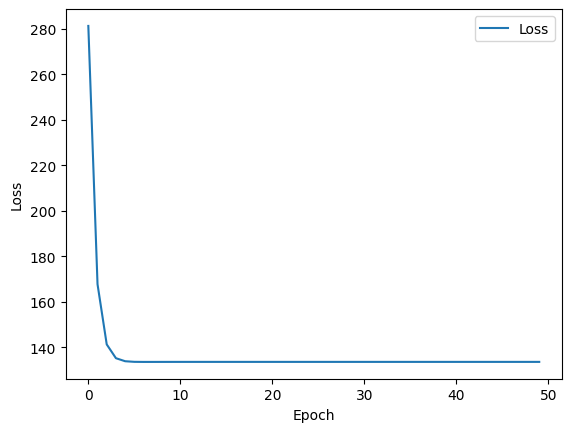

Loss on Test Data:  [[152.89790389]]


In [4]:
# Create a Instance of The N.N class
Neural_Network = ThreeLayerNeuralNetwork(input_nodes=8, hidden_nodes=25, output_nodes=1, learning_rate=0.001, activation_function='sigmoid', Optimizer='SGD')

# # Normalize the Data
# X_Train = X_Train/np.amax(X_Train, axis=0)
# Y_Train = Y_Train/np.amax(Y_Train, axis=0)

Neural_Network.Train(X_Train, Y_Train, epochs=50)

y_pred = []

# Find the Loss on the Test Data
for i in range(len(x_test)):
    y_pred.append(Neural_Network.Test(x_test[i]))

# Calculate the Loss
Loss = 0
for i in range(len(y_test)):
    Loss += Neural_Network._loss_function(y_test[i], y_pred[i])

print('Loss on Test Data: ', Loss/len(y_test))
